In [1]:
from scripts.cross_validation_script import Cross_Validation

In [2]:
kwargs = {'ndim': 1, 'ntrees': 100}#, 'scoring_metric': 'density'}
scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']

for score in scoring_metrics:
    kwargs['scoring_metric'] = score
    Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='ggXToYYTo2Mu2E_m18').train_k_models()

This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__fold_1_of_5.
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__fold_2_of_5.
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__fold_3_of_5.
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__fold_4_of_5.
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_depth__fold_5_of_5.
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_density__fold_1_of_5.
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_density__fold_2_of_5.
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_density__fold_3_of_5.
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_density__fold_4_of_5.
This model already exists: trained_models/model__ndim_1_

In [3]:
mean_curve ={}
error_curve={}
base ={}
auc_mean={} 
auc_unc={}
scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']

for idx, score in enumerate(scoring_metrics):
    kwargs['scoring_metric'] = score
    mean_curve[idx], error_curve[idx], base[idx], auc_mean[idx], auc_unc[idx] = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='ggXToYYTo2Mu2E_m18').get_kfold_uncertainty()
    print(f'{score} done!')

depth done!
density done!
adj_depth done!
adj_density done!
boxed_ratio done!
boxed_density2 done!
boxed_density done!


In [4]:
import pickle

# Assume mean_curve, error_curve, base, auc_mean, auc_unc are your dictionaries

# Save dictionaries to file
with open('fivefold_scoringmerticscan_values/fivefold_scoringmetric_ggXToYYTo2Mu2E_m18.pkl', 'wb') as f:
    pickle.dump(mean_curve, f)
    pickle.dump(error_curve, f)
    pickle.dump(base, f)
    pickle.dump(auc_mean, f)
    pickle.dump(auc_unc, f)

print("Data saved successfully.")


Data saved successfully.


In [20]:
import pickle

# Load dictionaries from file
with open('fivefold_scoringmerticscan_values/fivefold_scoringmetric_ggXToYYTo2Mu2E_m18.pkl', 'rb') as f:
    mean_curve = pickle.load(f)
    error_curve = pickle.load(f)
    base = pickle.load(f)
    auc_mean = pickle.load(f)
    auc_unc = pickle.load(f)

print("Data loaded successfully.")


Data loaded successfully.


In [5]:
for idx, score in enumerate(scoring_metrics):
    kwargs['scoring_metric'] = score
    mean_curve[idx], error_curve[idx], base[idx], auc_mean[idx], auc_unc[idx] = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='GluGluHToTauTau').get_kfold_uncertainty()

In [2]:
import matplotlib.pyplot as plt
import numpy as np

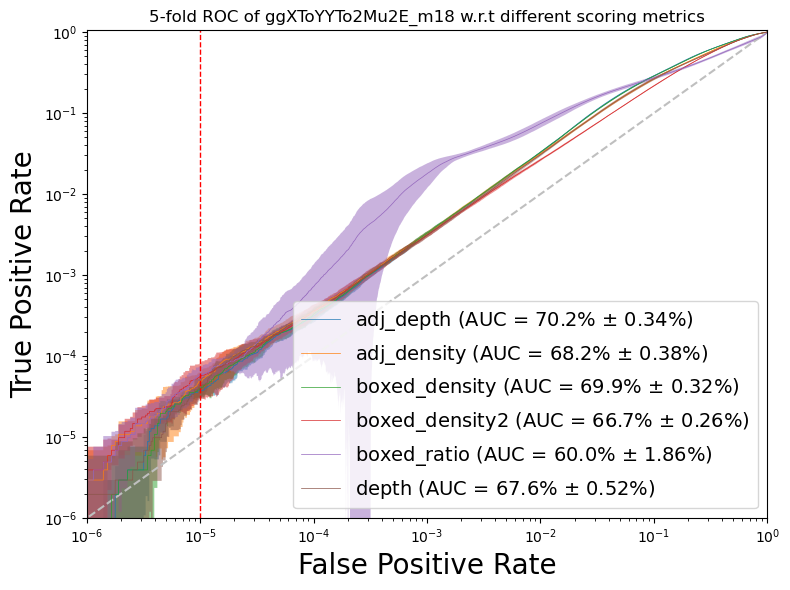

In [25]:
#plt.title('BB')



#scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']
scoring_metrics = ['adj_depth', 'adj_density', 'boxed_density', 'boxed_density2', 'boxed_ratio', 'depth']
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1), np.linspace(0, 1), '--', color='0.75')
for idx, score in enumerate(scoring_metrics): 
    plt.plot(base[idx],mean_curve[idx], linewidth=0.5,  label=f'{score} (AUC = %.1f%% $\pm$ %.2f%%)' % (auc_mean[idx] * 100, auc_unc[idx] * 100))
    plt.fill_between(base[idx],
                mean_curve[idx] - error_curve[idx],
                mean_curve[idx] + error_curve[idx],
                alpha=0.5)

plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)

plt.title('5-fold ROC of ggXToYYTo2Mu2E_m18 w.r.t different scoring metrics')

plt.semilogx()
plt.semilogy()
plt.xlim([10**-(6), 1.0])
plt.ylim([10**-(6), 1.05])

plt.legend(loc='lower right',fontsize=14)
plt.tight_layout()
plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
#plt.savefig(f'{score}')
#plt.savefig('all')
plt.show()


In [3]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'boxed_ratio'}
#scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density2', 'boxed_density']

In [5]:
ogg = Cross_Validation(kfold=5, model_parameters=kwargs, sigkey='ggXToYYTo2Mu2E_m18')

In [6]:
model_list = ogg.get_model_name()


In [7]:
fpr = {}
tpr = {}
auc = {}

In [8]:
ogg.cross_val_splits()

In [9]:
for idx, mdl in enumerate(model_list):
    fpr[idx], tpr[idx], auc[idx] = ogg.predict_value(model=mdl)
    

In [10]:
import matplotlib.pyplot as plt
import numpy as np

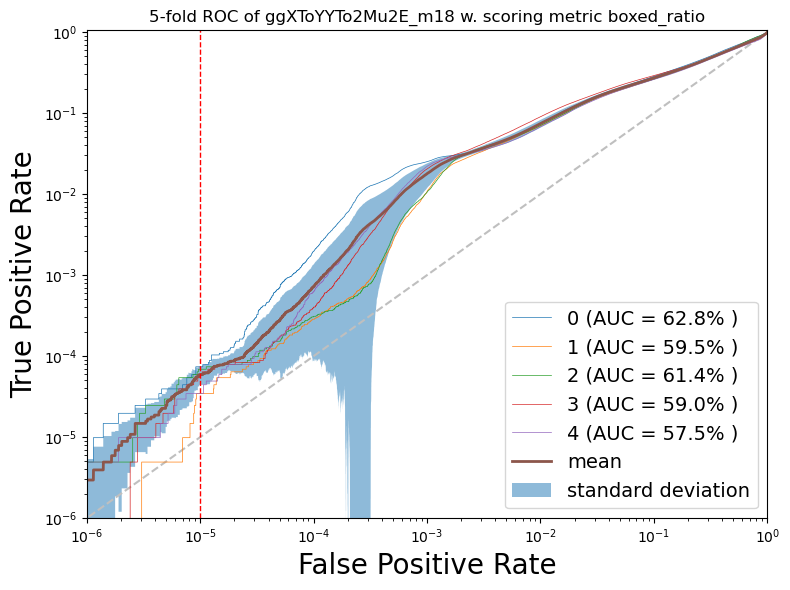

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1), np.linspace(0, 1), '--', color='0.75')
for idx, score in enumerate(model_list): 
    plt.plot(fpr[idx],tpr[idx], linewidth=0.5,  label=f'{idx} (AUC = %.1f%% )' % (auc[idx] * 100))

#for num in range(7):
num = 4
plt.plot(base[num], mean_curve[num], linewidth=2, label='mean')

plt.fill_between(base[num],
                mean_curve[num] - error_curve[num],
                mean_curve[num] + error_curve[num],
                alpha=0.5, label='standard deviation')

plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)

plt.title('5-fold ROC of ggXToYYTo2Mu2E_m18 w. scoring metric boxed_ratio')

plt.semilogx()
plt.semilogy()
plt.xlim([10**-(6), 1.0])
plt.ylim([10**-(6), 1.05])

plt.legend(loc='lower right',fontsize=14)
plt.tight_layout()
plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
#plt.savefig(f'{score}')
plt.savefig('boxed_ratio all')
plt.show()



In [11]:
import pickle

# Load dictionaries from file
with open('fivefold_scoringmerticscan_values/fivefold_scoringmetric_ggXToYYTo2Mu2E_m18.pkl', 'rb') as f:
    mean_curve = pickle.load(f)
    error_curve = pickle.load(f)
    base = pickle.load(f)
    auc_mean = pickle.load(f)
    auc_unc = pickle.load(f)

print("Data loaded successfully.")


Data loaded successfully.


array([5.00000000e-08, 5.00008406e-08, 5.00016812e-08, ...,
       9.99966378e-01, 9.99983189e-01, 1.00000000e+00])

In [ ]:
    def predict_value(self, model, output1="score"): #works!  # maybe need to indicate which fold we're at ????
        loaded_model = pickle.load(open(model, 'rb'))
        x_test, labels = self.get_testset_labels()
        score_x_test = loaded_model.predict(x_test, output=output1)
        FPR, TPR, _ = roc_curve(labels, score_x_test)
        AUC = auc(FPR, TPR)
        return FPR, TPR, AUC

In [4]:
mean_curve, error_curve, base, auc_mean, auc_unc = okk.get_kfold_uncertainty()

In [2]:
import matplotlib.pyplot as plt

In [7]:
plot_auroc_unc_(mean_curve, error_curve, base, auc_mean, auc_unc)

NameError: name 'plot_auroc_unc_' is not defined

In [9]:
def plot_auroc_unc_(mean_curve, error_curve, base, auc_mean, auc_unc): 
    plt.title('BB')
    plt.plot(base,mean_curve, linewidth=0.5,  label='depth (AUC = %.1f%% $\pm$ %.1f%%)' % (auc_mean * 100, auc_unc * 100))
    plt.semilogx()
    plt.semilogy()
    plt.fill_between(base,
                mean_curve - error_curve,
                mean_curve + error_curve,
                alpha=0.5)
    plt.legend(loc='lower right',fontsize=15)

In [3]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'density'}
okk = Cross_Validation(kfold=3, model_parameters=kwargs, sigkey='GluGluHToTauTau')
okk.train_k_models()
#oo,ll = okk.get_testset_labels()

This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_density__fold_1_of_3 !
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_density__fold_2_of_3 !
This model already exists: trained_models/model__ndim_1__ntrees_100__scoring_metric_density__fold_3_of_3 !


In [3]:
okk.train_and_save_model()


This model already exists!


In [4]:
FPR, TPR, AUC = okk.predict_value()

In [6]:
import matplotlib.pyplot as plt

[]

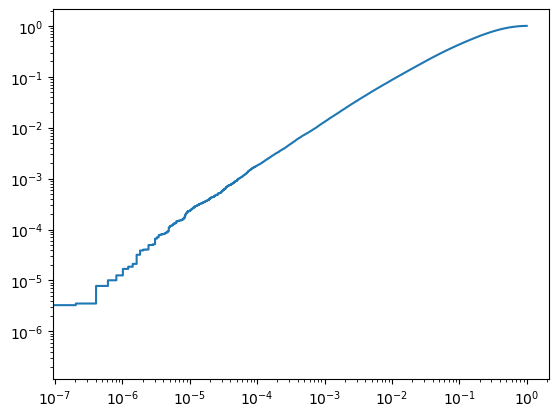

In [8]:
plt.plot(FPR, TPR)
plt.semilogx()
plt.semilogy()

In [9]:
okk.sig

array([[ 87.,   0.,  15., ...,   0.,   0.,   0.],
       [ 24.,   0.,  48., ...,   0.,   0.,   0.],
       [ 81.,   0.,   3., ...,   0.,   0.,   0.],
       ...,
       [ 68.,   0.,  22., ...,   0.,   0.,   0.],
       [ 30.,   0., 135., ...,   0.,   0.,   0.],
       [206.,   0., 126., ...,   0.,   0.,   0.]], dtype=float16)